## Exploratory Data Analyst

In [2]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pointbiserialr, chi2_contingency


In [ ]:
df = pd.read_csv('FP_DelaySense_dataset_DA.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id                   10999 non-null  int64 
 1   warehouse_block      10999 non-null  object
 2   mode_of_shipment     10999 non-null  object
 3   customer_care_calls  10999 non-null  int64 
 4   customer_rating      10999 non-null  int64 
 5   cost_of_the_product  10999 non-null  int64 
 6   prior_purchases      10999 non-null  int64 
 7   product_importance   10999 non-null  object
 8   gender               10999 non-null  object
 9   discount_offered     10999 non-null  int64 
 10  weight_in_gms        10999 non-null  int64 
 11  reached_on_time      10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


### 1. Berapa banyak barang yang terdistribusi tepat waktu dan barang yang tidak tepat waktu

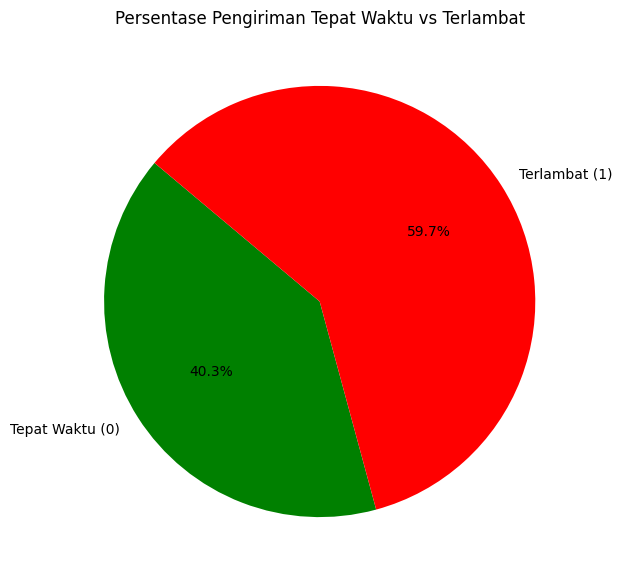

In [4]:
# Pastikan urutannya: 0 (tepat waktu), 1 (terlambat)
dist = df['reached_on_time'].value_counts().sort_index()

# Label sesuai urutan index
labels = ['Tepat Waktu (0)', 'Terlambat (1)']

# Plot ulang
plt.figure(figsize=(7,7))
plt.pie(dist, labels=labels, autopct='%1.1f%%', startangle=140, colors=['green','red'])
plt.title("Persentase Pengiriman Tepat Waktu vs Terlambat")
plt.show()


In [5]:
dist

reached_on_time
0    4436
1    6563
Name: count, dtype: int64

### 2. Apakah diskon yang besar akan berpengaruh terhadap ketepatan pengirimian?

Karena kolom discount_offered bertipe numerikal dan kolom reached_on_time bertipe biner maka saya akan menggunakan Point Biserial untuk mengecek Korelasi antar kolom

In [6]:
correlation, p_value = pointbiserialr(df['reached_on_time'], df['discount_offered'])

print(f"Point Biserial Correlation: {correlation:.4f}")
print(f"P-Value: {p_value:.4f}")

Point Biserial Correlation: 0.3971
P-Value: 0.0000


Dari hasil korelasi yang kita lakukan kita bisa melihat dari nilai Correlationnya sebesar 0.397 ini menjelaskan bahwa terdapat korelasi yang cukup besar antara diskon yang diberikan dengan ketepatan pengiriman, dan karena hasilnya positif artinya semakin tinggi diskon yang diberikan maka semakin besar juga kemungkinan barang akan terlambat.

Lalu dari nilai P-Value yang bernilai 0 ini menunjukkan bahwa hubungan ini signifikan secara statistik, dengan kata lain ada bukti yang sangat kuat bahwa diskon berpengaruh terhadap ketepatan waktu pengiriman

### 3. Apakah mode pengiriman (Flight, Ship, Road) akan berpengaruh terhadap ketepan waktu pengiriman?

Karena kedua kolom berifat kategorikal saya akan melakukan uji hipotesis dengan menggunakan Chi-Square Cintigency dengan hipotesis

H0 = Tidak ada hubungan antara mode pengiriman dengan ketepatan waktu  
H1 = Ada hubungan antara mode pengiriman dan ketepatan waktu

In [7]:
# Buat tabel kontingensi
contingency_table = pd.crosstab(df['mode_of_shipment'], df['reached_on_time'])

# Lakukan uji Chi-Square
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Cetak hasil
print("Chi-Square Statistic:", chi2)
print("Degrees of Freedom:", dof)
print("P-Value:", p)
print("\nTabel Kontingensi:")
print(contingency_table)

Chi-Square Statistic: 0.7434357246718558
Degrees of Freedom: 2
P-Value: 0.6895487627593786

Tabel Kontingensi:
reached_on_time      0     1
mode_of_shipment            
Flight             708  1069
Road               725  1035
Ship              3003  4459


Dari hasil uji hipotesis dengan chi-square yang sudah dilakukan menunjukkan nilai P-value > 0.05 ini berarti kita gagal menolak H0, artinya tidak ada hubungan antara mode pengiriman dengan ketepatan waktu.

Lalu dari hasil chi-square yang kecil (mendekati 0) ini berarti data yang kita miliki mendukung H0, artinya tidak ada hubungan antara mode pengiriman dengan ketepatan waktu 